# DarkELF multiphonon notebook

This notebook is meant to illustrate the part of the darkELF package for calculating dark matter-phonon rates in the multiphonon regime.

written by Ethan, 01/23/2021

In [1]:
%matplotlib inline

import sys, os
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import rc, rcParams
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time
import pandas
from scipy import interpolate

# Make use of TeX\ufeff
rc('text',usetex=True)
# Change all fonts to 'Computer Modern'
rc('font',**{'size':14, 'family':'serif','serif':['Times New Roman']})
rc('xtick.major', size=5, pad=7)
rc('xtick', labelsize=15)
rc('ytick.major', size=5, pad=7)
rc('ytick', labelsize=15)

# this needs to point to the folder where darkelf.py is stored
work_dir = os.getcwd()
sys.path.append(work_dir+"/..")
plotdir=work_dir+"/plots/"

# load the package
from darkelf import darkelf, targets

## Load the materials

When loading the materials, the "dos_filename" flag must be set in order to calculate rates in the multiphonon regime. The "target_yaml" flag is set automatically and can be overridden. Auxiliary functions "Fn" are pre-tabulated corresponding to the given density of states files and loaded in by default. If using another density of states, one must first run the "create_Fn_omega()" function on the desired density of states.

In [2]:
targets.files('GaAs')


Available configuration files: 
	 GaAs.yaml
 
Available data for epsilon: 
	 GaAs_mermin.dat
	 GaAs_epsphonon_data10K.dat
 
Available data for phonon density of states: 
	 GaAs_DoS.dat
 
Available data for Fn(omega) functions: 
	 GaAs_Fn.dat


If one is only interested in the multiphonon response, the electronic response specified with the "filename" flag is not used. If it is not specified, the code will produce a warning message, as seen below. This can be ignored as long as we only care about DM-multiphonon scattering. Let's load a few materials.

In [3]:
gaas = darkelf(target='GaAs',dos_filename="GaAs_DoS.dat")
si = darkelf(target='Si',dos_filename="Si_DoS.dat")
c = darkelf(target='C',dos_filename="C_DoS.dat")

 .... Loading files for GaAs
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Warning! Atomic Migdal calculation not present
Loaded GaAs_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  GaAs_DoS.dat
 .... Loading files for Si
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Loaded Si_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  Si_DoS.dat
 .... Loading files for C
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Loaded C_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  C_DoS.dat


# Cross section plots

Now using the sigma_nucleon function to calculate the required reaches for a rate of 3 events/kg/yr, the larger dark matter mass points take longer to calculate since the integral over the allowed phase space is larger and requires more numerically intensive integrations.

Points 0 to 4 took 0.23364996910095215 seconds to calculate
Points 5 to 9 took 0.48093199729919434 seconds to calculate
Points 10 to 14 took 5.970164775848389 seconds to calculate
Points 15 to 19 took 7.025084972381592 seconds to calculate
Points 20 to 24 took 18.045959949493408 seconds to calculate
Points 25 to 29 took 20.609495878219604 seconds to calculate


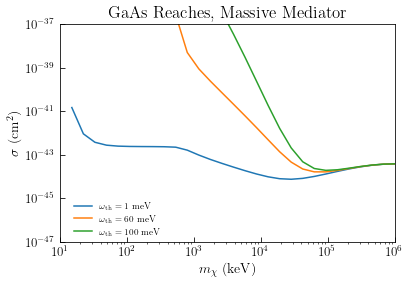

In [4]:
points = 30 

mdm = np.logspace(4, 9, points)

reaches1 = np.zeros(points)
reaches2 = np.zeros(points)
reaches3 = np.zeros(points)

import time

for i, mass in enumerate(mdm):
    start = time.time()
    reaches1[i] = gaas.sigma_nucleon(mass, 1e-3, mediator='massive')
    reaches2[i] = gaas.sigma_nucleon(mass, 6e-2, mediator='massive')
    reaches3[i] = gaas.sigma_nucleon(mass, 1e-1, mediator='massive')
    end = time.time()
    if (i % 5) == 4:
        print(f'Points {i - 4} to {i} took {end - start} seconds to calculate')
        # Just to check that everything is still working, the last points
        # take the longest
        
fig, ax = plt.subplots()

cmap = plt.get_cmap('tab10')
colors = cmap(np.linspace(0.0,1.0,10))

ax.plot(mdm/1e3, reaches1, label='$\omega_\mathrm{th} = 1$ meV', color=colors[0])
ax.plot(mdm/1e3, reaches2, label='$\omega_\mathrm{th} = 60$ meV', color=colors[1])
ax.plot(mdm/1e3, reaches3, label='$\omega_\mathrm{th} = 100$ meV', color=colors[2])

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$m_\chi \ (\mathrm{keV})$')
ax.set_ylabel('$\sigma \ (\mathrm{cm}^2)$')

ax.tick_params(axis="both",which="major",labelsize=13,direction="in",pad=5)

ax.set_title(r'GaAs Reaches, Massive Mediator')

ax.set_xlim([1e1,1e6])
ax.set_ylim([1e-47,1e-37])

xtick_major = [pow(10.,n) for n in range(1,7,1)]
ytick_major = [pow(10.,n) for n in range(-47,-36,2)]
ax.set_yticks(ytick_major)
ax.set_xticks(xtick_major)

ax.legend(loc=(0.03,0.01),fontsize=9,frameon=False,ncol=1)

plt.savefig(plotdir+"gaas_massive_multiphonon.pdf",bbox_inches='tight')

If starting with a new density of states, one must run the create_Fn_omega() function. This defaults to creating the Fn functions corresponding to the density of states loaded in in the instantiation of the class. This can take up to an hour.

In [ ]:
si.create_Fn_omega()